<a href="https://colab.research.google.com/github/tylerlum/deep_learning/blob/master/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model

import random
np.random.seed(0)

In [23]:
## Get data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
## Assert checks
assert(X_train.shape[0] == Y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28" 
assert(X_test.shape[0] == Y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28"

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


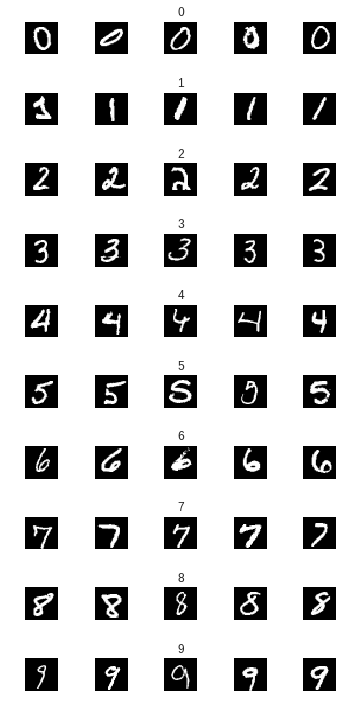

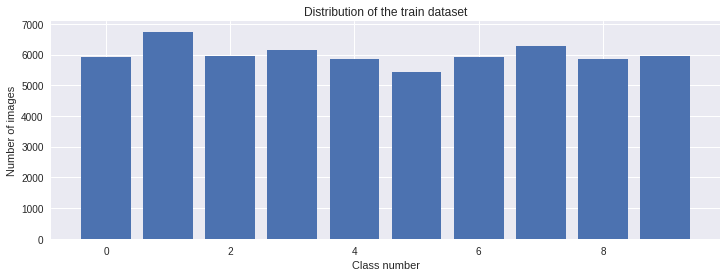

In [25]:
## Plot data
num_of_samples = []
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[Y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis('off')

        ## Label the middle column 
        if i == int(cols/2):
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('Distribution of the train dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')
plt.show()

In [0]:
## Normalize data
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [0]:
## Define the LeNet Model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [42]:
## Create leNet Model
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [43]:
## Plot accuracy and loss
h = model.fit(X_train, Y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 51us/step - loss: 0.2455 - acc: 0.9214 - val_loss: 0.0478 - val_acc: 0.9862
Epoch 2/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0678 - acc: 0.9795 - val_loss: 0.0398 - val_acc: 0.9877
Epoch 3/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0583 - acc: 0.9825 - val_loss: 0.0440 - val_acc: 0.9870
Epoch 4/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0491 - acc: 0.9846 - val_loss: 0.0462 - val_acc: 0.9872
Epoch 5/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0459 - acc: 0.9862 - val_loss: 0.0390 - val_acc: 0.9890
Epoch 6/10
54000/54000 [==============================] - 2s 43us/step - loss: 0.0392 - acc: 0.9881 - val_loss: 0.0393 - val_acc: 0.9895
Epoch 7/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.0400 - acc: 0.9875 - val_loss: 0.0374 - val_acc:

Text(0.5,0,'epoch')

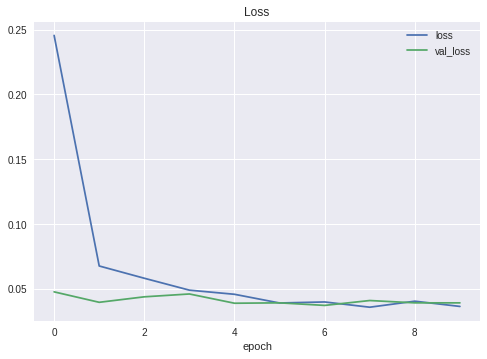

In [44]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

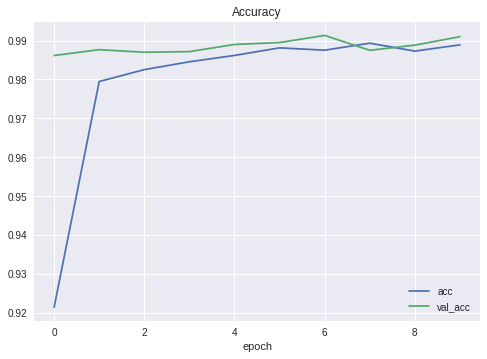

In [45]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

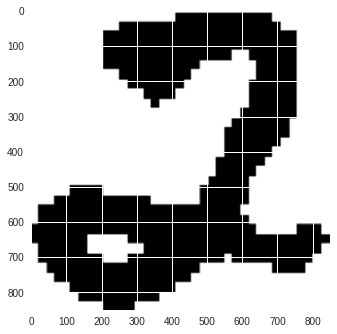

In [49]:
## Test network on different image
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

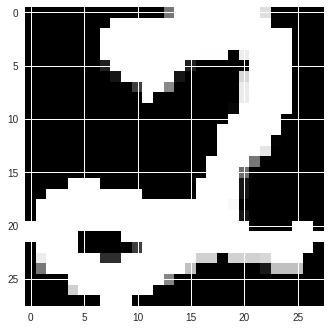

In [50]:
## Resize + format img
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28,28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img - img / 255
img = img.reshape(1, 28, 28, 1)

In [51]:
prediction = model.predict_classes(img)
print('Predicted digit is: {0}'.format(prediction))

Predicted digit is: [2]


In [54]:
## Use Model API
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


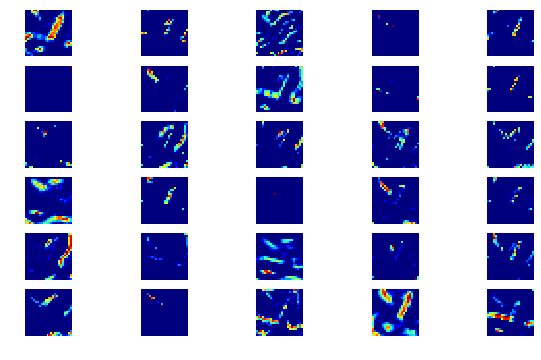

In [55]:
## Plot layer
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

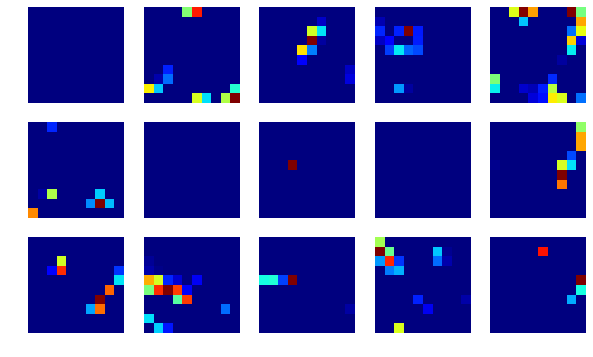

In [56]:
## Plot deeper layer
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')